DAT405 Assignment 3

Theodor Jendle - 9901134339 - 

Carl Hjalmarsson - 9305198930 - 

In [63]:
import nbdime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

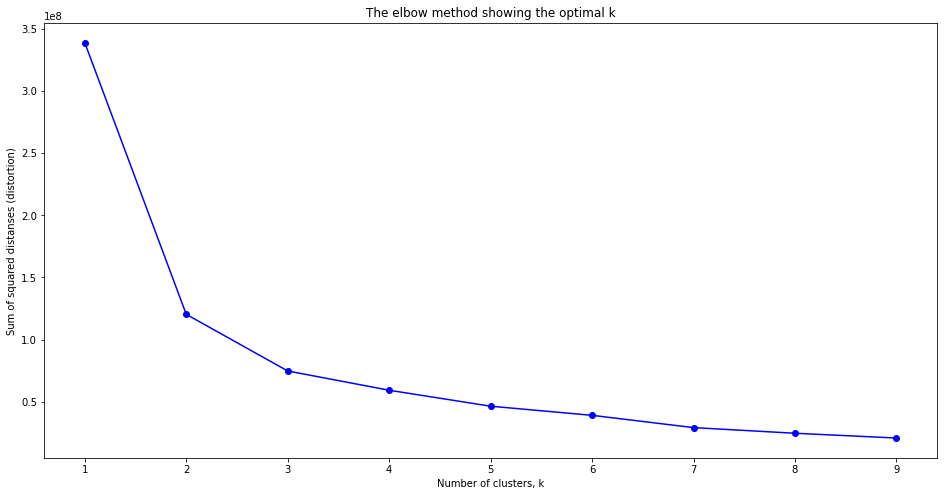

In [64]:

protein_data = pd.read_csv("assignment3-data.csv", index_col = False)

angle_data = protein_data[['phi', 'psi']]

# inspired by https://predictivehacks.com/k-means-elbow-method-code-for-python/
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(angle_data)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Sum of squared distanses (distortion)')
plt.title('The elbow method showing the optimal k')
plt.show()

### Problem 2 a)
The inertia is defined as the sum of the sum of squared distances for every point to its respective center. Using this as a measurement for the tightness of the clustering, and plotting for different values of k, we can see where the graph changes slope the most, in this case at k=2. This means that the tightness of the clusters doesn't change as much after this point, indicating that the optimal number of clusters is indeeed k=2. 

Note: Since the unit circle is defined for values between -180 to 180 degrees, the distance between say an angle of -170 degrees and 190 degrees is 20. The K-means model has no information about the nature of the data. This means that points in our data that actually are close to each other are interpreted as being far apart, and is an issue that needs correction.

In [66]:
twomeans = KMeans(n_clusters=2, random_state=0).fit(angle_data)
validation_score_k2 = silhouette_score(angle_data, twomeans.labels_)
print(validation_score_k2)

"""
x1 = 170
x2 = 180
print(abs(x1-x2)%180)
"""

0.6328209708884562


'\nx1 = 170\nx2 = 180\nprint(abs(x1-x2)%180)\n'

### 2 b)
As we can see the score is mediocre as the greatest value. The reason for this is because the data is not formatted to our needs, as mentioned in Problem 2 a).